### Covariance Matrix calculations and plots

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from helpers import plot_class
from helpers import helpfunction as helper

In [14]:
input_dir = "./input/July2020/csv/"
output_dir = "./output/nue/beamextraction/"

In [18]:
df_mc = pd.read_csv(input_dir+'slimmed_nuecc_sel_mc.csv')
df_on = pd.read_csv(input_dir+'slimmed_nuecc_sel_beamon.csv')
df_ext = pd.read_csv(input_dir+'slimmed_nuecc_sel_beamoff.csv')
df_mc['nue'] = df_mc.eval('abs(nu_pdg)==12 & true_fid_vol')

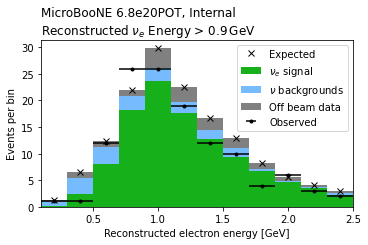

In [52]:
fig, ax = plt.subplots(figsize=(5,3.3), constrained_layout=True)
ax.set_title('MicroBooNE 6.8e20POT, Internal\n'+r'Reconstructed $\nu_e$ Energy > $0.9\,$GeV', loc='left')
ax.set_xlabel('Reconstructed electron energy [GeV]')
ax.set_ylabel('Events per bin')
ax.set_xlim(0.1,2.5)

data = [df_mc.query('nue').eval('shr_energy_y_v/1000'),
        df_mc.query('~nue').eval('shr_energy_y_v/1000'),
        df_ext.eval('shr_energy_y_v/1000')]
weights = [df_mc.query('nue').eval('plot_weight'),
           df_mc.query('~nue').eval('plot_weight'),
           df_ext.eval('plot_weight')]
colours = ["xkcd:green","xkcd:sky blue","grey"]
labels = [r'$\nu_e$ signal', r'$\nu$ backgrounds', 'Off beam data']

on_bins, _ = np.histogram(df_on.eval('shr_energy_y_v/1000'), bins=edges)
ax.errorbar(mids, on_bins, label = 'Observed', xerr = edges[1:]-mids, fmt='.', color='k')
bins, edges, _ = ax.hist(data, weights=weights, color=colours, label=labels, range=(0.1,2.5), bins=12, histtype='barstacked')
bins_tot = np.sum(bins, axis=0)
mids = (edges[1:]+edges[:-1])/2
ax.plot(mids, bins[-1], label = 'Expected', lw=0, marker='x', color='k')
ax.legend()
fig.savefig(output_dir+'sideband_scaled_exp_obs.pdf')